# Analysis 1 - Popularity of Donald Trump in news in last 6 months till the election month 'November 2016'

# create files, fetch json data from url and load json data into files

In [1]:
import os
years = ['2012','2013','2014','2015','2016']
dataDir = '/Users/prashantverma/Documents/Python/final/data/'

# function to count occurence of "Trump" in a json file

In [2]:
def getYearlyFreq (file,keyWord):
    snippets = []
    with open(file) as infile:
        data = json.load(infile)
        lenth = len(data['response']['docs'])
        for i in range(lenth):
            snippets.append(data['response']['docs'][i]['snippet'])
    
    
    count = 0
    for snippet in snippets:
        words = str(snippet).split(' ')
        
        for word in words:
            if word == keyWord:
                count += 1
    
    return count

# use above function to count the occurence of "Trump","Hilary","Obama" in each year's json file

In [6]:
import requests,json
import glob

Trump = []
Hilary = []
Obama = []

for year in years:

    files = glob.glob(dataDir+'/'+year+'/*.json')
    freq = []
    for file in files:
        Trump.append(getYearlyFreq(file,"Trump"))
        Hilary.append(getYearlyFreq(file,"Hilary"))
        Obama.append(getYearlyFreq(file,"Obama"))


freqList = zip(years,Trump,Hilary,Obama)
freqList = list(freqList)
freqList

[('2012', 1, 0, 190),
 ('2013', 1, 1, 281),
 ('2014', 1, 0, 213),
 ('2015', 0, 1, 103),
 ('2016', 7, 1, 153)]

# import output to csv file

In [9]:
import csv
with open('ana1/Output.csv','w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Year","Trump","Hilary","Obama"])
    writer.writerows(freqList)

# load csv data as dataframe

In [11]:
import pandas as pd
df = pd.read_csv('ana1/Output.csv')
df.head()

,Year,Trump,Hilary,Obama
0,2012,1,0,190
1,2013,1,1,281
2,2014,1,0,213
3,2015,0,1,103
4,2016,7,1,153


# Plot bar graph using seaborn

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


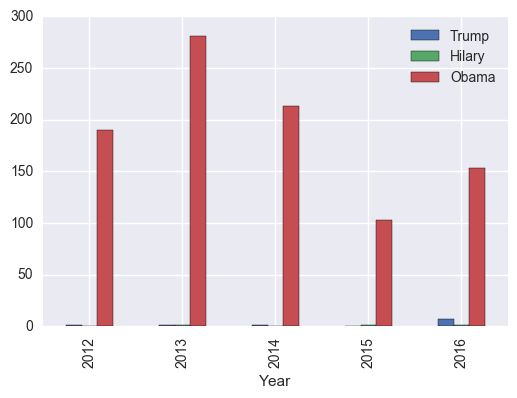

In [25]:
% pylab inline
df.plot.bar(x='Year')

# Analysis proves there was a substatntial percent increase in headlines about Trump in NYTimes News